<a href="https://colab.research.google.com/github/trex99/DAVI/blob/main/12%EC%A3%BC%EC%B0%A8_Lecture_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화의 원리(핵심요소)

## Visualization Wheel(Alberto Cairo)

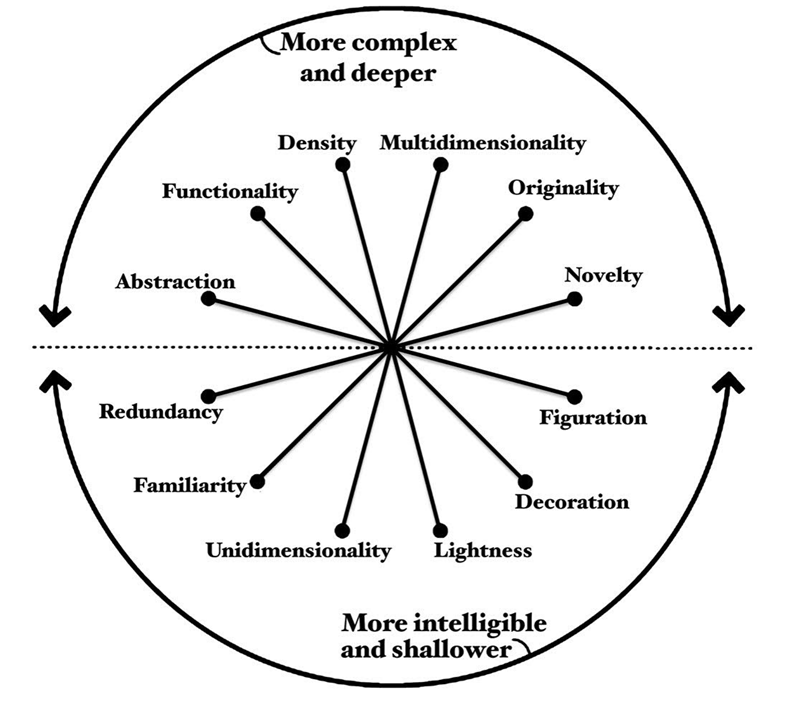

## 표현의 원칙

   - 시각화에 투입된 데이터셋의 특성만 표현
   - 최대한 의미있는 정보만 표현
   - 보는 사람이 누구이고, 보는 사람이 보고자 하는 것이 무엇인지 표현

# 시각화 절차

  - 데이터 준비 (수집)
  - 데이터 전처리 (정제 및 구조화)
  - 데이터 추출 및 마이닝
  - 데이터 시각화
  - 시각화 개선 (의미와 목적 강조)

# 시각화 오류

Misleading 방지와 발생 사례
   - 원근감을 반드시 고려하여야 한다. (가능하면 2D 출력 권장)
   - 반드시 필요한 정보 제공 (정당의 색상과 토지면적, 정당의 색상과 인구수)
   - 2개 이상의 plot에서의 기준 값
   - 컬러의 비매칭
   - 비율이나 범위가 다른 2개 데이타를 하나의 plot에 출력


<font size=5>[Graphics Lies Misleading Visuals](https://faculty.ucmerced.edu/jvevea/classes/Spark/readings/Cairo2015_Chapter_GraphicsLiesMisleadingVisuals.pdf)</font>

# 시각화 오류 사례(Case)

<font size=5>[How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)</font>

- 3D 오류

http://www.google.com/chart?cht=p3&chs=250x250&chd=s:PPPP


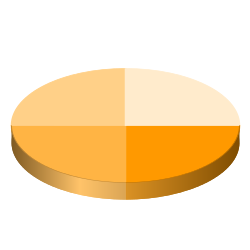

In [155]:
from pygooglechart import PieChart3D
from PIL import Image

chart = PieChart3D(250, 250) # 객체 초기화 (크기 설정 : 250 x 250 pixels)
chart.add_data([25, 25, 25, 25]) # 데이터 설정
chart.download('example.png')  # 이미지 생성 (google 에서 생성)
print(chart.get_url())

Image.open('example.png')

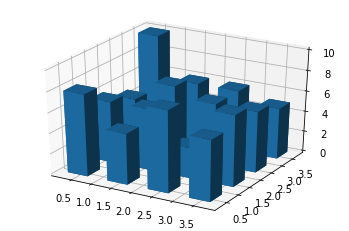

In [158]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

- "0"부터 시작하지 않는 시각화

In [18]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# 데이터 불러오기
data = pd.read_csv('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


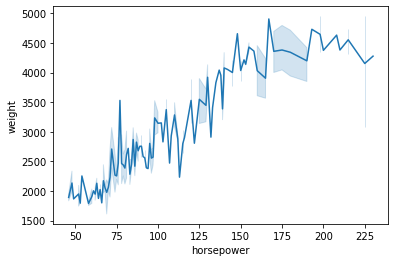

In [12]:
sns.lineplot(data=data, x='horsepower', y='weight')
plt.show()

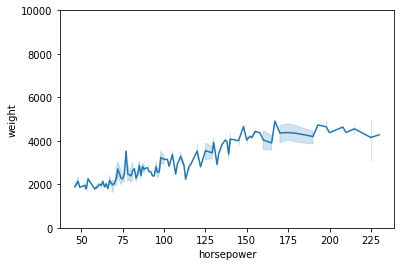

In [17]:
plt.ylim([0, 10000])
sns.lineplot(data=data, x='horsepower', y='weight')
plt.show()

In [20]:
data = pd.read_csv('houseprice.csv')
data.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


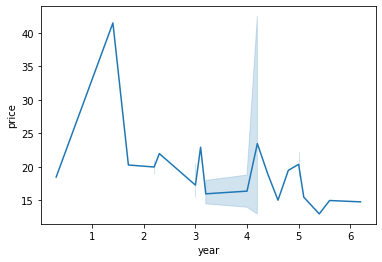

In [21]:
# plt.ylim([0, 10000])
sns.lineplot(data=data, x='year', y='price')
plt.show()

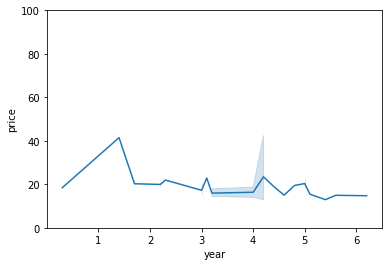

In [22]:
plt.ylim([0, 100])
sns.lineplot(data=data, x='year', y='price')
plt.show()

In [52]:
data = pd.read_csv('도매가격.csv')
data.head()

,datadate,등급명,시장명,가격(원)
0,20130102,상품,가락도매,43037
1,20130102,상품,엄궁도매,36380
2,20130102,상품,북부도매,38174
3,20130102,상품,각화도매,28896
4,20130102,상품,오정도매,26922


In [76]:
df = data.groupby('datadate').sum()
# df = df.reset_index()
# df['datadate'] = pd.to_datetime(df['datadate'], format='%Y%m%d')
df.head()

,가격(원)
datadate,
20130102,366519
20130103,365538
20130104,363165
20130105,352321
20130106,405550


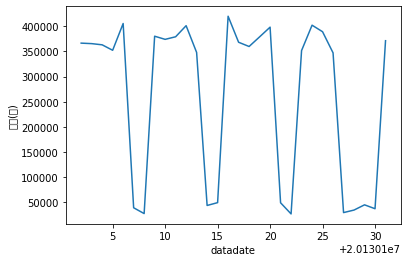

In [79]:
sns.lineplot(data=df, x='datadate', y='가격(원)')
plt.show()

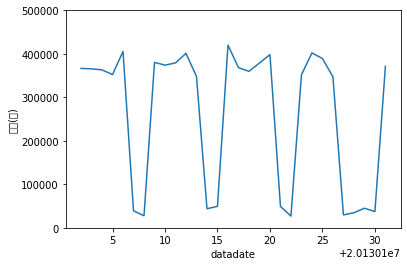

In [86]:
plt.ylim([0, 500000])
sns.lineplot(data=df, x='datadate', y='가격(원)')
plt.show()

- 비율이나 범위가 다른 2개 데이타를 하나의 plot에 출력

In [172]:
data = pd.read_csv('Credit.csv', index_col=0)
data = data.reset_index(drop=True)
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [179]:
data_1 = data[data['Income'] == ' Male']
data_2 = data[data['Gender'] == 'Female']

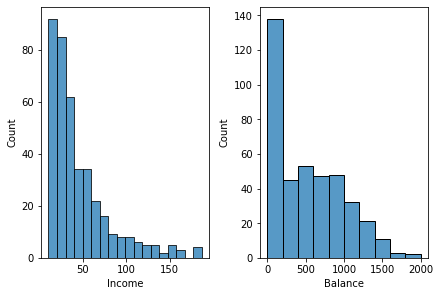

In [228]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True)
sns.histplot(x=data['Income'], ax=ax[0])
sns.histplot(x=data['Balance'], ax=ax[1])
plt.show()

- 2개 이상의 plot에서의 기준 값

In [207]:
import librosa
from scipy.io import wavfile

voice_1, sample_rate1 = librosa.load('common_voice_en_africa_10053.wav', sr=48000)
sample_rate1, voice_1.shape

(48000, (300672,))

In [208]:
sample_rate2, voice_2 = wavfile.read('common_voice_en_africa_10053.wav')
sample_rate2, voice_2.shape

(48000, (300672,))

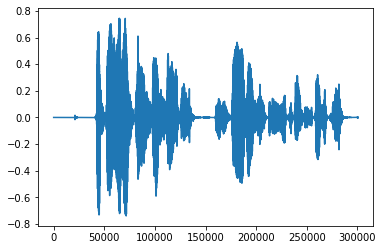

In [214]:
plt.plot(voice_1)

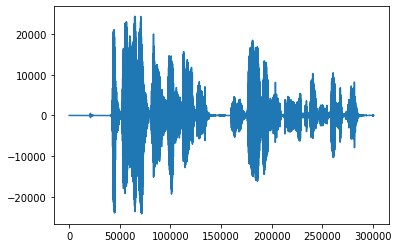

In [215]:
plt.plot(voice_2)

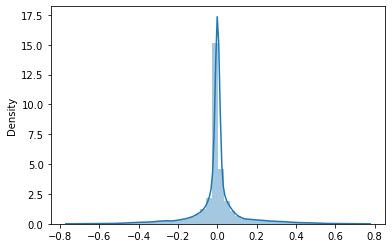

In [216]:
sns.distplot(voice_1)

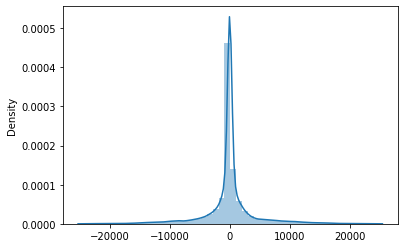

In [217]:
sns.distplot(voice_2)

- 시각화 방법 선택 오류

In [230]:
data = pd.read_csv('도매가격.csv')
data.head()

,datadate,등급명,시장명,가격(원)
0,20130102,상품,가락도매,43037
1,20130102,상품,엄궁도매,36380
2,20130102,상품,북부도매,38174
3,20130102,상품,각화도매,28896
4,20130102,상품,오정도매,26922


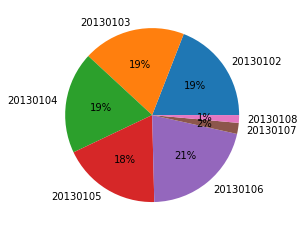

In [231]:
s_data = data.groupby('datadate').sum()
s_data = s_data.reset_index()
data_x = s_data['가격(원)'].values[:4]
labels = s_data.datadate.values[:4]
plt.pie(data_x, labels=labels, autopct='%.0f%%')
plt.show()

# 시각화 오류 정리

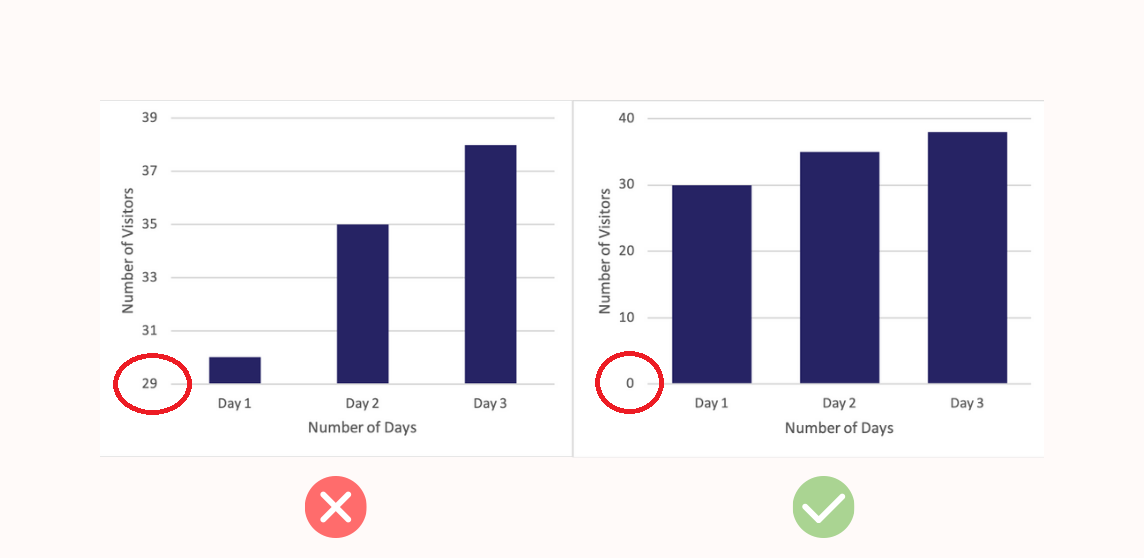

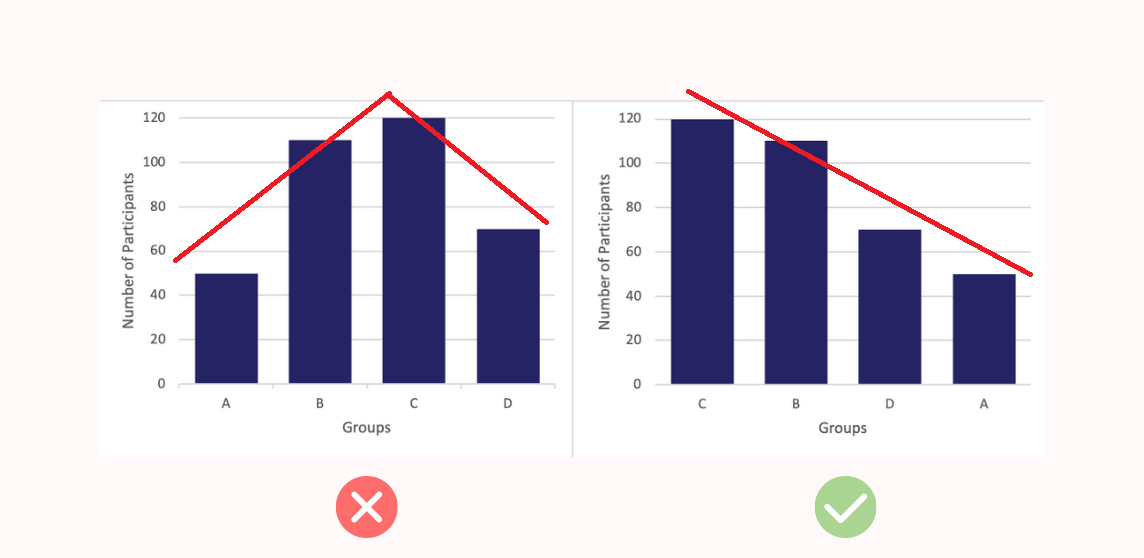

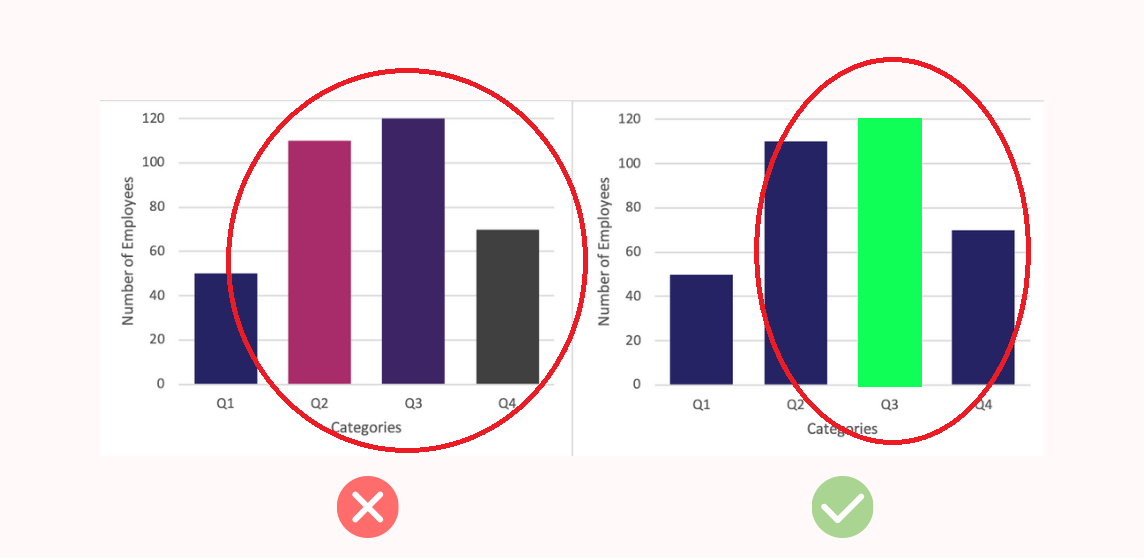

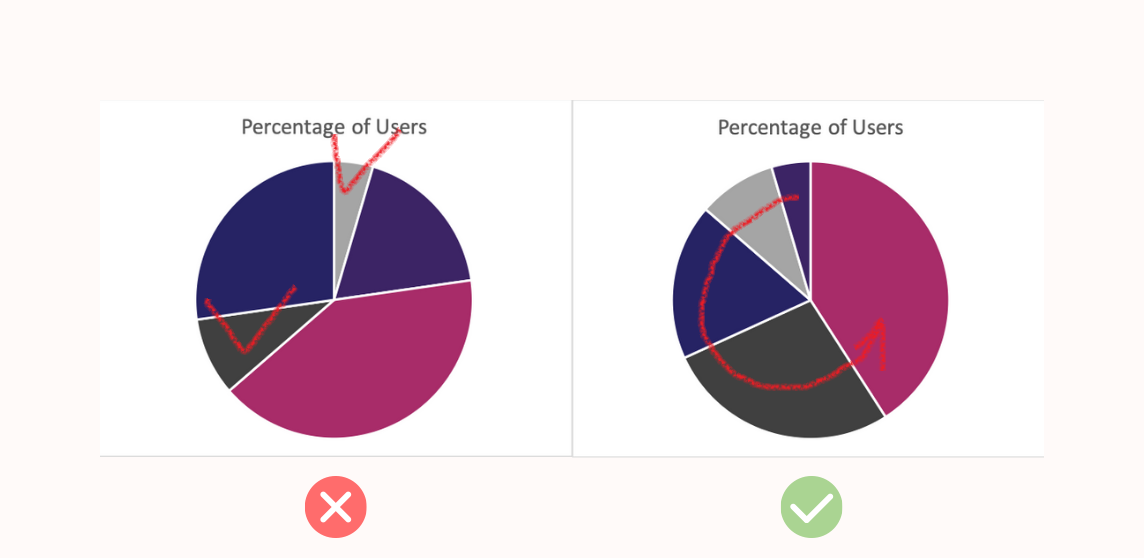

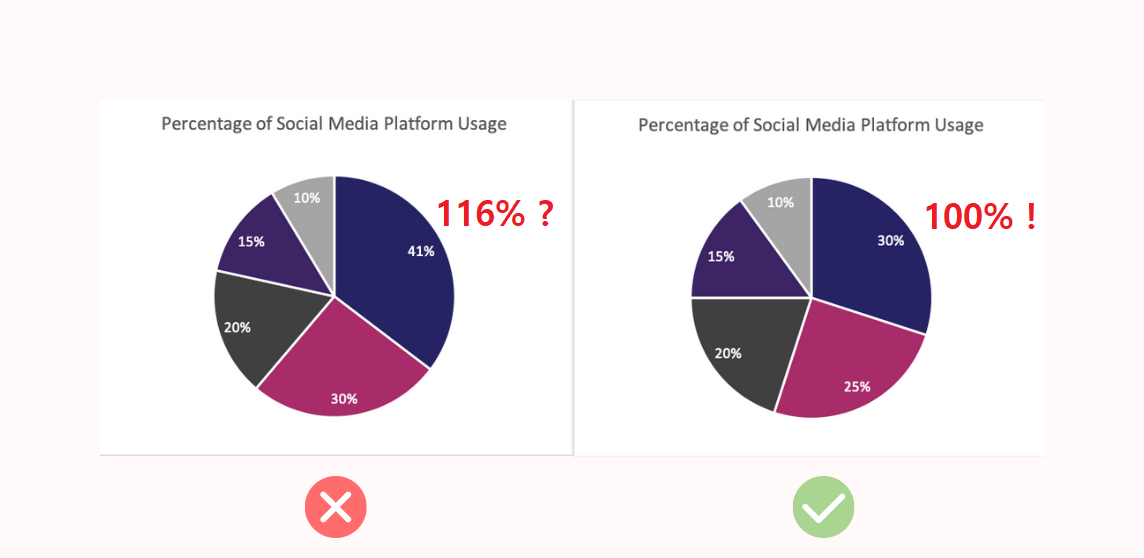

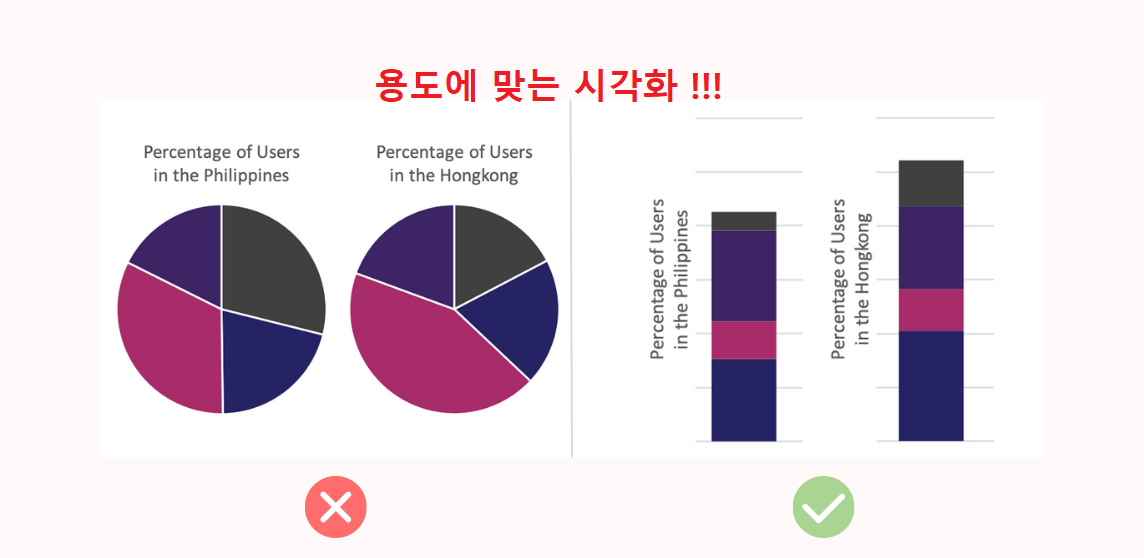